<a href="https://colab.research.google.com/github/tam8738/KHDL/blob/main/clean_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Thông tin dữ liệu ban đầu:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6046 entries, 0 to 6045
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  6046 non-null   int64 
 1   Body        6045 non-null   object
 2   Label       6046 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 141.8+ KB
None

Phân bố nhãn ban đầu:
Label
0    0.686404
1    0.313596
Name: proportion, dtype: float64

Giá trị thiếu:
Body     534
Label      0
dtype: int64

Số mẫu sau khi xóa NaN: 5512

Số mẫu sau khi xóa Cleaned_Body rỗng: 5506

Kiểm tra trùng lặp:
Số mẫu trùng lặp: 612

Các mẫu trùng lặp (nếu có):
                                         Cleaned_Body  Label
1   fight risk cancer slim guarantee lose day get ...      1
2   fight risk cancer slim guarantee lose day get ...      1
9   dea

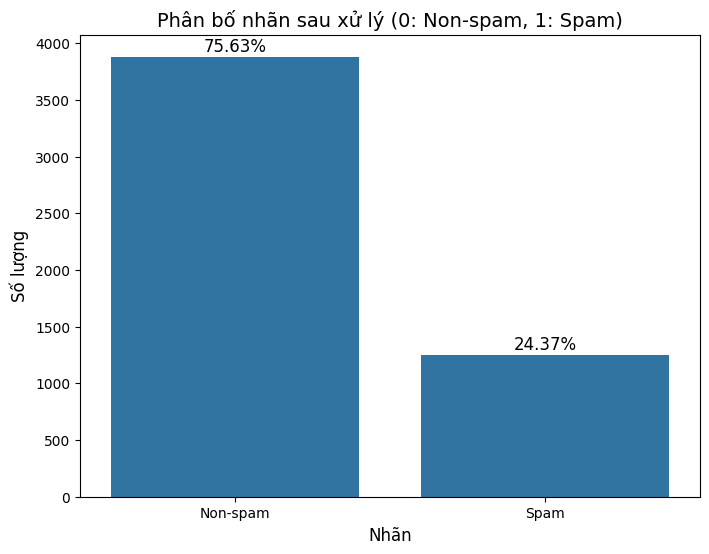


Đã lưu dữ liệu đã xử lý vào: processed_data2_cleaned.csv

Dữ liệu sau khi xử lý (5 mẫu đầu tiên):
                                                Body  \
0  \nSave up to 70% on Life Insurance.\nWhy Spend...   
1  1) Fight The Risk of Cancer!\nhttp://www.adcli...   
2  1) Fight The Risk of Cancer!\nhttp://www.adcli...   
3  ##############################################...   
4  I thought you might like these:\n1) Slim Down ...   

                                        Cleaned_Body  Label  
0  save life insurance spend tolife quote saving ...      1  
1  fight risk cancer slim guarantee lose day get ...      1  
2  fight risk cancer slim guarantee lose day get ...      1  
3  adult club offer free membership instant acces...      1  
4  think might like slim guarantee lose day fight...      1  


In [30]:
# Import các thư viện cần thiết
import pandas as pd
import numpy as np
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk
import matplotlib.pyplot as plt
import seaborn as sns

# Tải các tài nguyên NLTK
nltk.download('stopwords')
nltk.download('wordnet')

# Khởi tạo stopwords và lemmatizer
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Hàm làm sạch văn bản
def clean_text(text):
    if pd.isna(text) or text.strip().lower() == 'empty':
        return ''
    # Chuyển về chữ thường
    text = text.lower()
    # Xóa ký tự không phải ASCII (như ï¿½)
    text = re.sub(r'[^\x00-\x7F]+', '', text)
    # Xóa URL
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    # Xóa ký tự đặc biệt và số
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\d+', '', text)
    # Xóa từ ngắn (1-2 ký tự) và khoảng trắng thừa
    text = re.sub(r'\b\w{1,2}\b', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    # Loại bỏ stopwords và lemmatize (chuẩn hóa động từ và danh từ)
    words = [lemmatizer.lemmatize(word, pos='v') for word in text.split() if word not in stop_words]
    words = [lemmatizer.lemmatize(word, pos='n') for word in words]
    # Xóa các cụm vô nghĩa (như vonolmosatkirekpups)
    words = [word for word in words if len(word) > 2 and word.isalpha()]
    return ' '.join(words)

# Kết nối Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Đọc dữ liệu
file_path = '/content/drive/MyDrive/KHDL/data/email_spam.csv'  # Điều chỉnh đường dẫn nếu cần
df = pd.read_csv(file_path)

# Kiểm tra dữ liệu ban đầu
print("Thông tin dữ liệu ban đầu:")
print(df.info())
print("\nPhân bố nhãn ban đầu:")
print(df['Label'].value_counts(normalize=True))

# Bước 1: Xóa cột không cần thiết
df = df.drop(columns=['Unnamed: 0'])

# Bước 2: Xử lý giá trị thiếu và rỗng
df['Body'] = df['Body'].replace('empty', np.nan)
print("\nGiá trị thiếu:")
print(df.isna().sum())
df = df.dropna(subset=['Body'])
print(f"\nSố mẫu sau khi xóa NaN: {len(df)}")

# Bước 3: Làm sạch văn bản
df['Cleaned_Body'] = df['Body'].apply(clean_text)

# Loại bỏ các mẫu có Cleaned_Body rỗng
df = df[df['Cleaned_Body'] != '']
print(f"\nSố mẫu sau khi xóa Cleaned_Body rỗng: {len(df)}")

# Bước 4: Xử lý trùng lặp
print("\nKiểm tra trùng lặp:")
duplicates = df[df.duplicated(subset=['Cleaned_Body'], keep=False)]
print(f"Số mẫu trùng lặp: {len(duplicates)}")
print("\nCác mẫu trùng lặp (nếu có):")
print(duplicates[['Cleaned_Body', 'Label']].head())
df = df.drop_duplicates(subset=['Cleaned_Body'])
print(f"\nSố mẫu sau khi xóa trùng lặp: {len(df)}")

# Bước 5: Kiểm tra phân bố nhãn sau xử lý
print("\nPhân bố nhãn sau xử lý:")
print(df['Label'].value_counts(normalize=True))

# Bước 6: Vẽ biểu đồ phân bố nhãn
plt.figure(figsize=(8, 6))
sns.countplot(x='Label', data=df)
plt.title('Phân bố nhãn sau xử lý (0: Non-spam, 1: Spam)', fontsize=14)
plt.xlabel('Nhãn', fontsize=12)
plt.ylabel('Số lượng', fontsize=12)

# Thêm phần trăm vào biểu đồ
total = len(df)
for p in plt.gca().patches:
    height = p.get_height()
    plt.gca().text(p.get_x() + p.get_width()/2., height + 0.01*total,
                   f'{height/total*100:.2f}%', ha='center', fontsize=12)

plt.xticks([0, 1], ['Non-spam', 'Spam'])
plt.savefig('label_distribution.png')
plt.show()

# Bước 7: Lưu dữ liệu đã xử lý
output_path = 'processed_data2_cleaned.csv'
df.to_csv(output_path, index=False)
print(f"\nĐã lưu dữ liệu đã xử lý vào: {output_path}")

# Xem trước dữ liệu đã xử lý
print("\nDữ liệu sau khi xử lý (5 mẫu đầu tiên):")
print(df[['Body', 'Cleaned_Body', 'Label']].head())